In [1]:
import numpy as np
from waveletFunctions import wavelet, wave_signif
import matplotlib.pylab as plt
from matplotlib.gridspec import GridSpec
import matplotlib.ticker as ticker
import pandas as pd
from matplotlib import style
import os
import warnings as wg

In [13]:
wg.filterwarnings('ignore')

variance =  460.88134168522566


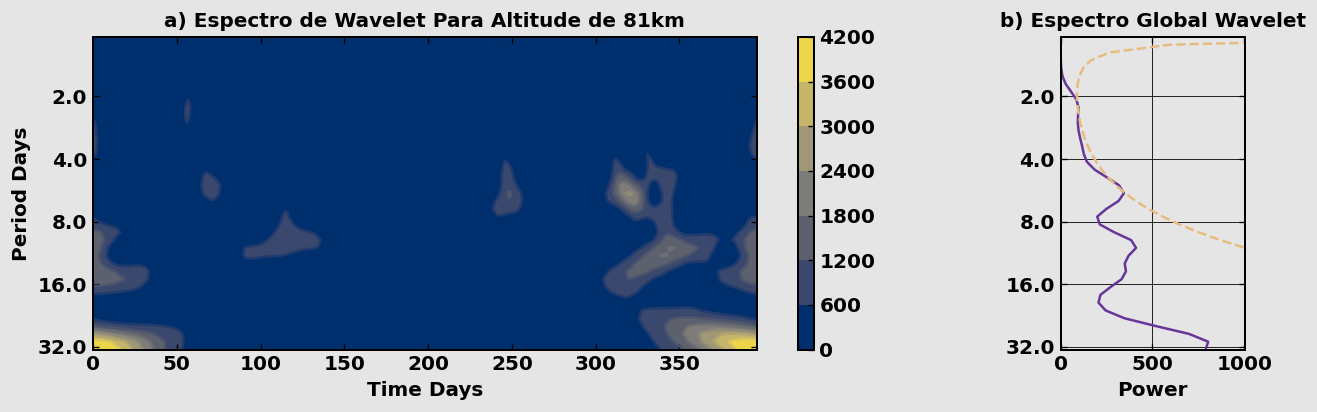

variance =  484.69882261255583


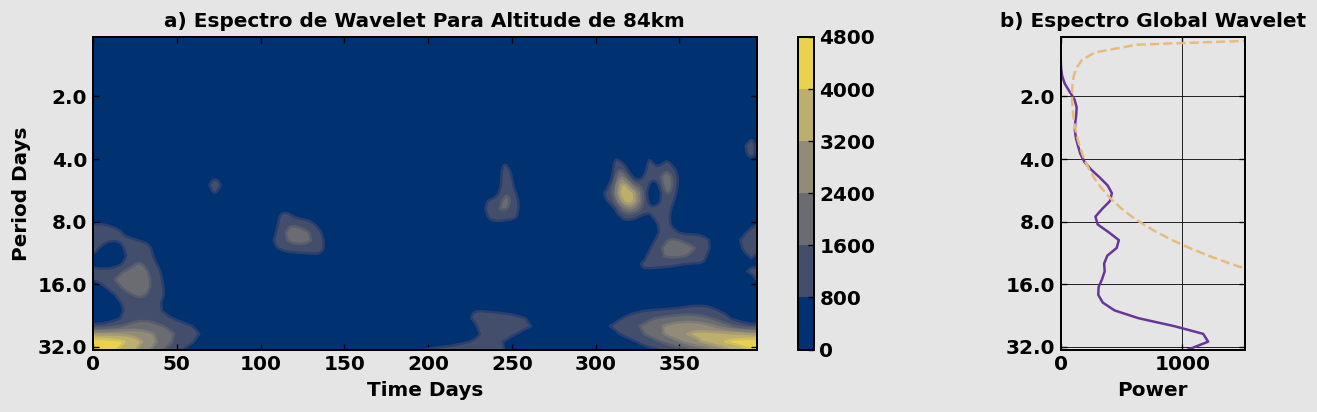

variance =  510.59301191087457


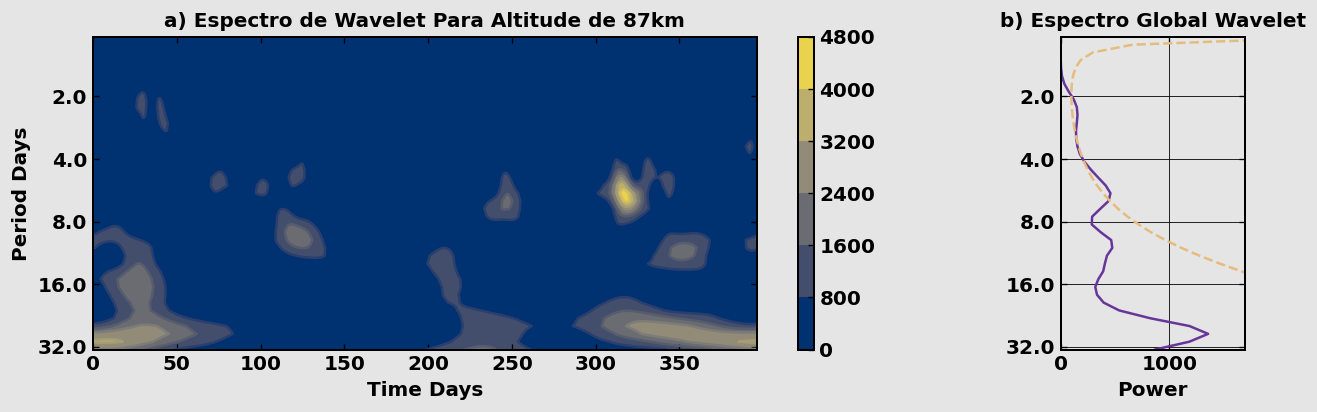

variance =  531.6831345983057


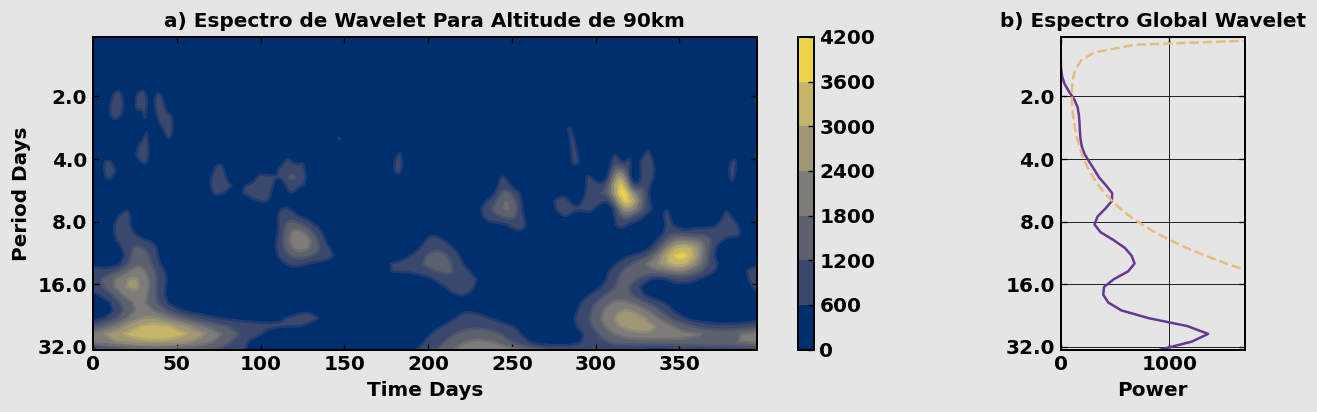

variance =  523.5606852200232


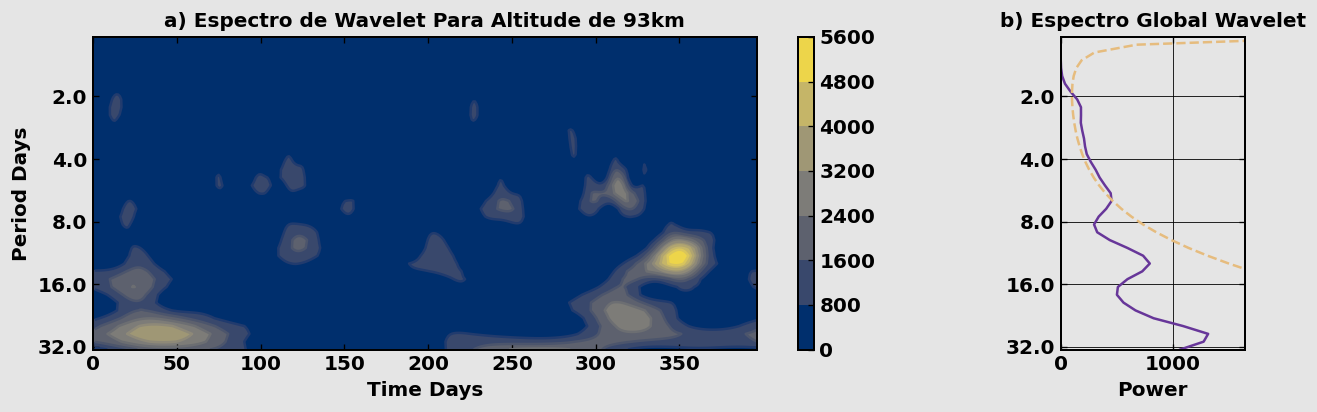

variance =  474.8618386883774


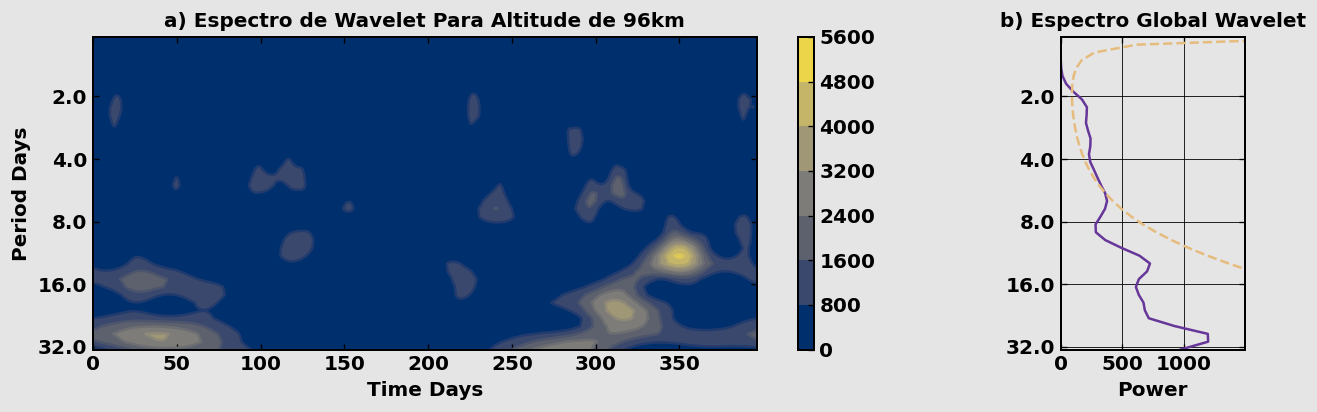

variance =  443.2139723512083


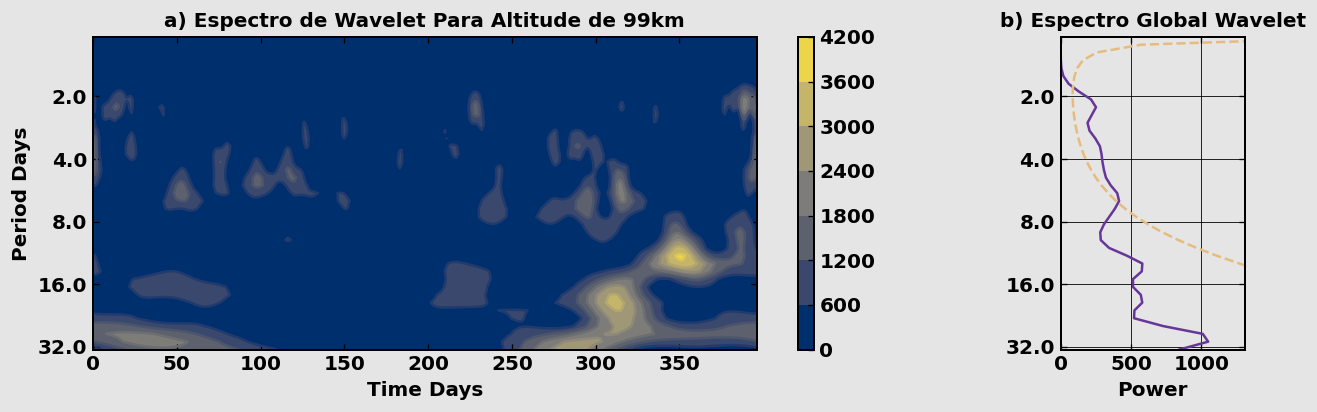

In [16]:
colunas = range(1, 15, 2)
local = 'dados/dados/cariri/mean_day.200601-200612.cariri.zon'
dados = pd.read_csv(local, sep='\s+', skiprows=[0, 2], usecols=list(colunas)) 
colunas = dados.columns[:]
for coluna in colunas:
    sst = dados[coluna]
    sst = np.array(sst.replace(np.nan, 0))
    variance = (np.std(sst, ddof=1))** 2
    print("variance = ", variance)    
    if 0:
        variance = 1.0
        sst = sst / np.std(sst, ddof=1)
    n = len(sst)

    dt = 1.0 # Escala de tempo

    time = np.arange(len(sst))+1   # construir minha escala temporal
    xlim = ([0, len(sst)])  # plotting range
    pad = 0  # pad the time series with zeroes (recommended)
    dj = 0.125  # this will do 4 sub-octaves per octave
    s0 = 1 * dt  # this says start at a scale of 6 months
    j1 = 5 / dj  # this says do 7 powers-of-two with dj sub-octaves each
    lag1 = 0.72  # lag-1 autocorrelation for red noise background
    mother = 'MORLET'

    # Wavelet transform:
    wave, period, scale, coi = wavelet(sst, dt, pad, dj, s0, j1, mother)
    power = (np.abs(wave)) ** 2  # compute wavelet power spectrum
    global_ws = (np.sum(power, axis=1) / n)  # time-average over all times

    # Significance levels:
    signif = wave_signif(([variance]), dt=dt, sigtest=0, scale=scale,
        lag1=lag1, mother=mother)
    sig95 = signif[:, np.newaxis].dot(np.ones(n)[np.newaxis, :])  # expand signif --> (J+1)x(N) array
    sig95 = power / sig95  # where ratio > 1, power is significant

    dof = n - scale  # the -scale corrects for padding at edges
    global_signif = wave_signif(variance, dt=dt, scale=scale, sigtest=1,
        lag1=lag1, dof=dof, mother=mother)
    levels = [0, 0.5, 1, 2, 4, 999]
    # *** or use 'contour'
    style.use('estilos/estilo2.mplstyle')
    #fig = plt.figure(figsize=(13,15))
    gs = GridSpec(3, 4, hspace=0.4, wspace=0.75)
    plt.subplots_adjust(left=0.1, bottom=0.05, right=0.9, top=0.95,
                        wspace=0, hspace=0)
    plt.subplot(gs[0, 0:3])
 
    # --- Contour plot wavelet power spectrum
    # plt3 = plt.subplot(3, 1, 2)
    plt3 = plt.subplot(gs[0, 0:3])
    levels = [0, 0.5, 1, 2, 4, 999]
    # *** or use 'contour'
    plt.grid(False)
    CS = plt.contourf(time, period, power, len(levels), cmap='cividis')
    plt.colorbar()
    im = plt.contour(CS, cmap='cividis')
    
    plt.xlabel('Time Days')
    plt.ylabel('Period Days')
    plt.title(f'a) Espectro de Wavelet Para Altitude de {coluna}km')
    plt.xlim(xlim[:])
    
    # 95# significance contour, levels at -99 (fake) and 1 (95# signif)
    # format y-scale
    plt3.set_yscale('log', base=2, subs=None)
    plt.ylim([np.min(period), np.max(period)])
    ax = plt.gca().yaxis
    ax.set_major_formatter(ticker.ScalarFormatter())
    plt3.ticklabel_format(axis='y', style='plain')
    plt3.invert_yaxis()

    plt4 = plt.subplot(gs[0, -1])
    plt.plot(global_ws, period)
    plt.plot(global_signif, period, '--')
    plt.xlabel('Power')
    plt.title('b) Espectro Global Wavelet')
    plt.xlim([0, 1.25 * np.max(global_ws)])
    # format y-scale
    plt4.set_yscale('log', base=2, subs=None)
    plt.ylim([np.min(period), np.max(period)])
    ax = plt.gca().yaxis
    ax.set_major_formatter(ticker.ScalarFormatter())
    plt4.ticklabel_format(axis='y', style='plain')
    plt4.invert_yaxis()
    plt.show()